In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.stats import linregress


In [2]:

#Read/convert CSV file into te data frame
energy_data_raw_df=pd.read_csv("owid-energy-data.csv")

#Filter the data to include only rows between the years 2018 and 2023:
energy_data_raw_df=energy_data_raw_df.loc[(energy_data_raw_df["year"] >= 2018) & (energy_data_raw_df["year"] <= 2023)]

energy_data_raw_df


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
18,ASEAN (Ember),2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.647,NaN,NaN,NaN,NaN,NaN,3.47,NaN,0.327,NaN
19,ASEAN (Ember),2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.224,NaN,NaN,NaN,NaN,NaN,5.91,NaN,0.531,NaN
20,ASEAN (Ember),2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.826,NaN,NaN,NaN,NaN,NaN,5.79,NaN,0.526,NaN
21,ASEAN (Ember),2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.130,NaN,NaN,NaN,NaN,NaN,7.63,NaN,0.666,NaN
22,ASEAN (Ember),2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.086,NaN,NaN,NaN,NaN,NaN,13.09,NaN,1.086,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21807,Zimbabwe,2019,ZWE,15354606.0,2.514642e+10,NaN,NaN,NaN,NaN,12.374,...,0.353,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN
21808,Zimbabwe,2020,ZWE,15669663.0,2.317871e+10,NaN,NaN,NaN,NaN,6.382,...,0.298,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN
21809,Zimbabwe,2021,ZWE,15993525.0,2.514009e+10,NaN,NaN,NaN,NaN,0.000,...,0.236,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN
21810,Zimbabwe,2022,ZWE,16320539.0,2.590159e+10,NaN,NaN,NaN,NaN,6.127,...,0.336,NaN,NaN,NaN,NaN,0.0,0.00,NaN,0.000,NaN


In [4]:
#Define the lists and assign values to them

large_countries = ["United States", "Indonesia", "Nigeria", "Japan", "Russia"]

small_countries=["Serbia", "Greece", "Croatia", "Hungary", "Slovenia"]

In [5]:
#Filter and select data from the existing data frame (check values(filter) and create a list of data/columns that wil remain in the newly created DataFrame )

large_countries_df = energy_data_raw_df.loc[energy_data_raw_df["country"].isin(large_countries),
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation","fossil_fuel_consumption", "coal_consumption"]]

# Print new DataFrame
large_countries_df



,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption,coal_consumption
9447,Indonesia,2018,267066848.0,194.13,45.801,34.289,285.29,283.790,1984.084,655.729
9448,Indonesia,2019,269582880.0,204.98,70.560,58.482,297.12,295.440,2109.228,801.231
9449,Indonesia,2020,271857984.0,199.91,31.332,76.806,293.37,291.820,1942.665,765.380
9450,Indonesia,2021,273753184.0,211.67,10.643,84.981,310.33,309.360,1975.075,763.230
9451,Indonesia,2022,275501344.0,225.45,12.427,95.542,334.51,333.540,2515.085,1216.511
9452,Indonesia,2023,277534112.0,NaN,17.620,112.376,NaN,350.609,2514.420,1199.906
10234,Japan,2018,126255872.0,564.50,7.653,5.137,1053.18,1053.180,4710.478,1386.597
10235,Japan,2019,125791680.0,537.49,-6.931,4.781,1025.78,1025.780,4556.221,1362.594
10236,Japan,2020,125244760.0,524.12,7.684,5.148,996.96,996.960,4189.554,1270.752
10237,Japan,2021,124612528.0,518.55,-2.865,5.000,1019.71,1019.710,4316.124,1369.467


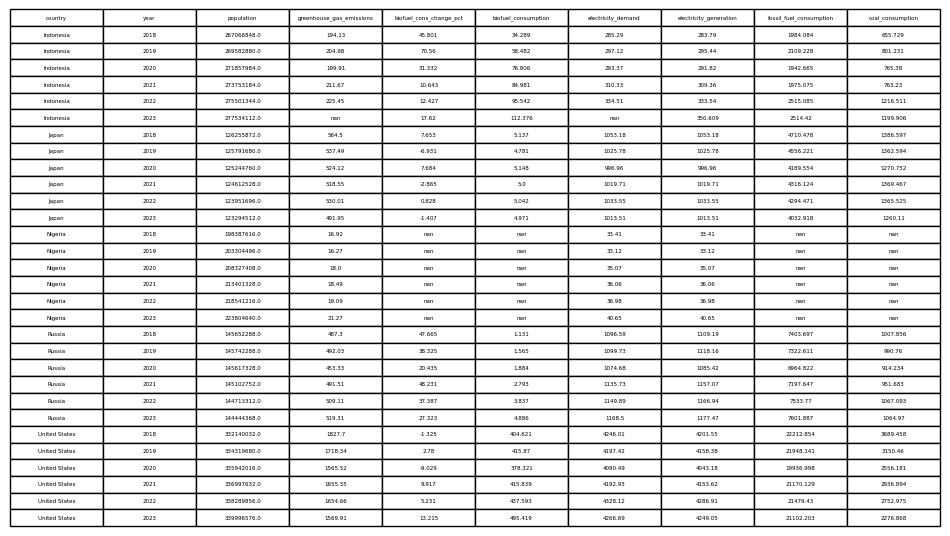

In [6]:
##Create a table and save as PNG

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.axis('tight')
ax.axis('off')

# Convert DataFrame to a table
table = ax.table(cellText=large_countries_df.values, 
                 colLabels=large_countries_df.columns, 
                 cellLoc='center', 
                 loc='center')

# Save plot as PNG
plt.savefig("large_countries_data_table.png", dpi=300, bbox_inches="tight")

#Display the table
plt.show()

In [7]:
#Filter and select data from the existing data frame (check values(filter) and create a list of data/columns that wil remain in the newly created DataFrame )

small_countries_df = energy_data_raw_df.loc[
    energy_data_raw_df["country"].isin(small_countries),
    ["country","year","population","greenhouse_gas_emissions","biofuel_cons_change_pct",
     "biofuel_consumption","electricity_demand","electricity_generation","fossil_fuel_consumption", "coal_consumption"]]

# Print new DataFrame
small_countries_df



,country,year,population,greenhouse_gas_emissions,biofuel_cons_change_pct,biofuel_consumption,electricity_demand,electricity_generation,fossil_fuel_consumption,coal_consumption
5035,Croatia,2018,4160488.0,2.72,4862.697,0.315,18.91,13.52,71.602,4.248
5036,Croatia,2019,4129749.0,3.07,131.074,0.728,18.78,12.65,72.605,4.900
5037,Croatia,2020,4096872.0,3.00,4.836,0.763,17.87,13.23,67.616,4.201
5038,Croatia,2021,4060139.0,3.18,39.413,1.063,19.07,15.11,69.077,4.830
5039,Croatia,2022,4030361.0,3.45,-76.778,0.247,18.93,14.24,68.931,4.727
5040,Croatia,2023,4008615.0,3.47,0.814,0.249,18.86,16.93,69.229,3.907
8243,Greece,2018,10633275.0,28.68,0.756,1.956,58.89,52.61,279.214,54.775
8244,Greece,2019,10574026.0,23.83,15.404,2.257,57.89,47.95,271.977,37.175
8245,Greece,2020,10512232.0,20.10,5.876,2.389,56.37,47.51,228.208,21.295
8246,Greece,2021,10445368.0,20.78,8.261,2.587,57.92,54.24,241.738,19.908


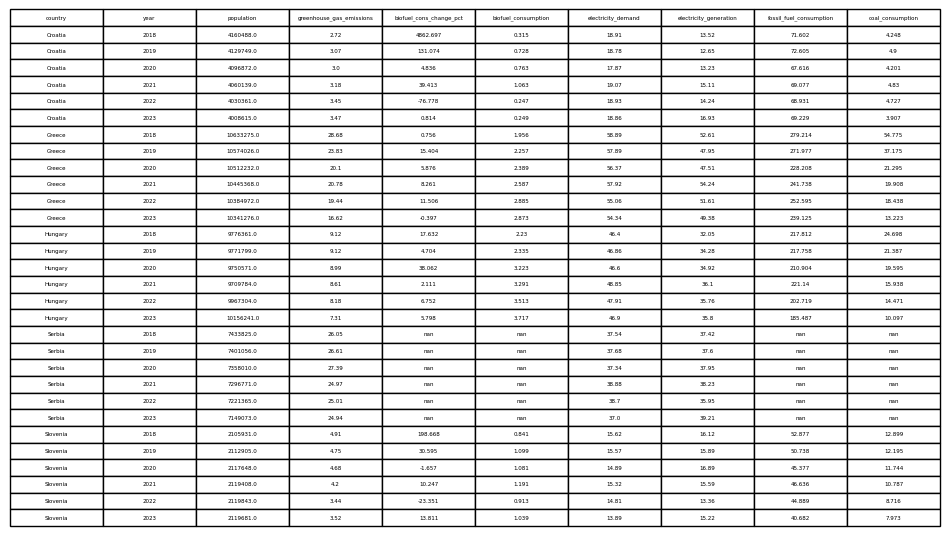

In [8]:
##Create a table and save as PNG

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6)) 
ax.axis('tight')
ax.axis('off')

# Convert DataFrame to a table
table = ax.table(cellText=small_countries_df.values, 
                 colLabels=small_countries_df.columns, 
                 cellLoc='center', 
                 loc='center')

# Save plot as PNG
plt.savefig("small_countries_data_table.png", dpi=300, bbox_inches="tight")

#Display the table
plt.show()

        country  year  greenhouse_gas_emissions
5040    Croatia  2023                      3.47
8248     Greece  2023                     16.62
9145    Hungary  2023                      7.31
17260    Serbia  2023                     24.94
17512  Slovenia  2023                      3.52


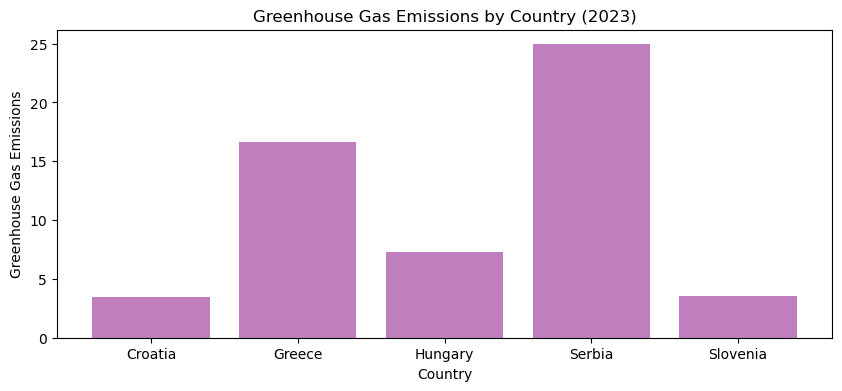

In [9]:
# Defines a list of countries you want to focus on for the analysis by creating a list of small countries
selected_countries_small = ["Slovenia", "Serbia", "Hungary", "Greece", "Croatia"]

# Find the most recent(max) year and retrieve it from small_countries_df DataFrame
latest_year = small_countries_df["year"].max()

# Filter the small_countries_df DataFrame to only include rows where the year is equal to latest_year( is nost recent year).
df_recent = small_countries_df[small_countries_df["year"] == latest_year]

# ilter the DataFrame further to only include rows where the country is in the selected_countries_small list.
df_recent = df_recent[df_recent["country"].isin(selected_countries_small)]

# Select the columns from the filtered DataFrame to create a new DataFrame ( in this case we are only looking for country, year, and greenhouse_gas_emissions columns)
df_final = df_recent[["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows
print(df_final.head())

#Create a figure for the plot with a width of 10 and height of 4 inches.
plt.figure(figsize=(10, 4))

#Plot a bar chart with the countries on the x-axis and their corresponding greenhouse gas emissions on the y-axis. The bars are colored purple with an alpha (transparency) of 0.5.
plt.bar(df_final["country"], df_final["greenhouse_gas_emissions"], color='purple', alpha=0.5)

#Set the x-axis label to "Country".
plt.xlabel("Country")

#Set the y-axis label to "Greenhouse Gas Emissions".
plt.ylabel("Greenhouse Gas Emissions")

##Sets the title of the plot to "Greenhouse Gas Emissions by Country (2023)".
plt.title("Greenhouse Gas Emissions by Country (2023)")

#Display the plot
plt.show()



posx and posy should be finite values
posx and posy should be finite values


             country  year  greenhouse_gas_emissions
9452       Indonesia  2023                       NaN
10239          Japan  2023                    491.95
13784        Nigeria  2023                     21.27
16716         Russia  2023                    519.31
20492  United States  2023                   1569.91


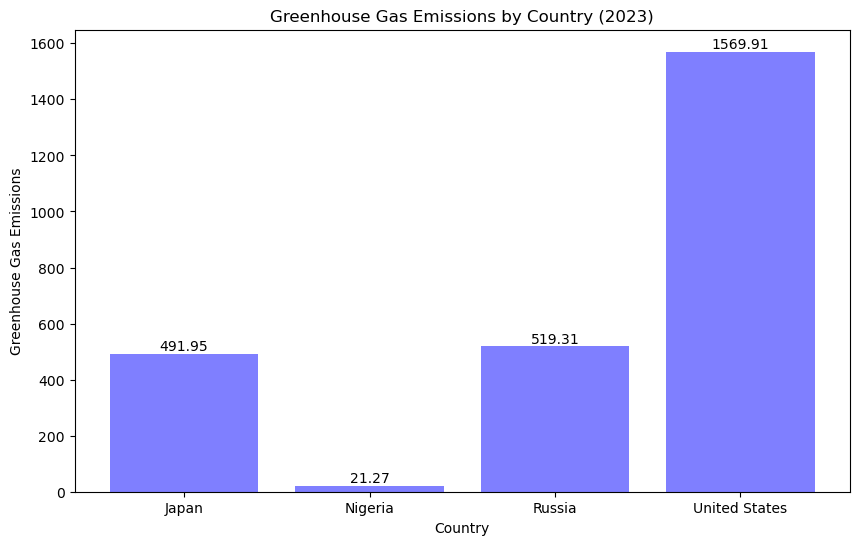

In [10]:
# Defines a list of countries you want to focus on for the analysis by creating a list of large countries
selected_countries_large = ["Indonesia", "Japan", "Nigeria", "Russia", "United States"]

# Find the most recent(max) year and retrieve it from large_countries_df DataFrame
latest_year = large_countries_df["year"].max()

# Filter the large_countries_df DataFrame to only include rows where the year is equal to latest_year( is nost recent year).
df_recent = large_countries_df[large_countries_df["year"] == latest_year]

# Check if Indonesia is present in the filtered data
if "Indonesia" not in df_recent["country"].values:
    print("Warning: Indonesia is missing from the data for the year", latest_year)

# ilter the DataFrame further to only include rows where the country is in the selected_countries_large list.
df_recent = df_recent[df_recent["country"].isin(selected_countries_large)]

# Select relevant columns
df_final = df_recent[["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows
print(df_final.head())

#Create a figure for the plot with a width of 10 and height of 4 inches.
plt.figure(figsize=(10, 6))

#Plot a bar chart with the countries on the x-axis and their corresponding greenhouse gas emissions on the y-axis. The bars are colored blue with an alpha (transparency) of 0.5.
bars = plt.bar(df_final["country"], df_final["greenhouse_gas_emissions"], color='blue', alpha=0.5)

# Adding value labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)


#Set the x-axis label to "Country".
plt.xlabel("Country")

#Set the x-axis label to "Greenhouse Gas Emissions"".
plt.ylabel("Greenhouse Gas Emissions")

#Sets the title of the plot to "Greenhouse Gas Emissions by Country (2023)"
plt.title(f"Greenhouse Gas Emissions by Country ({latest_year})")

#Display the plot
plt.show()



posx and posy should be finite values
posx and posy should be finite values


Large Countries Data:
              country  year  greenhouse_gas_emissions
9452       Indonesia  2023                       NaN
10239          Japan  2023                    491.95
13784        Nigeria  2023                     21.27
16716         Russia  2023                    519.31
20492  United States  2023                   1569.91
Small Countries Data:
         country  year  greenhouse_gas_emissions
5040    Croatia  2023                      3.47
8248     Greece  2023                     16.62
9145    Hungary  2023                      7.31
17260    Serbia  2023                     24.94
17512  Slovenia  2023                      3.52


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


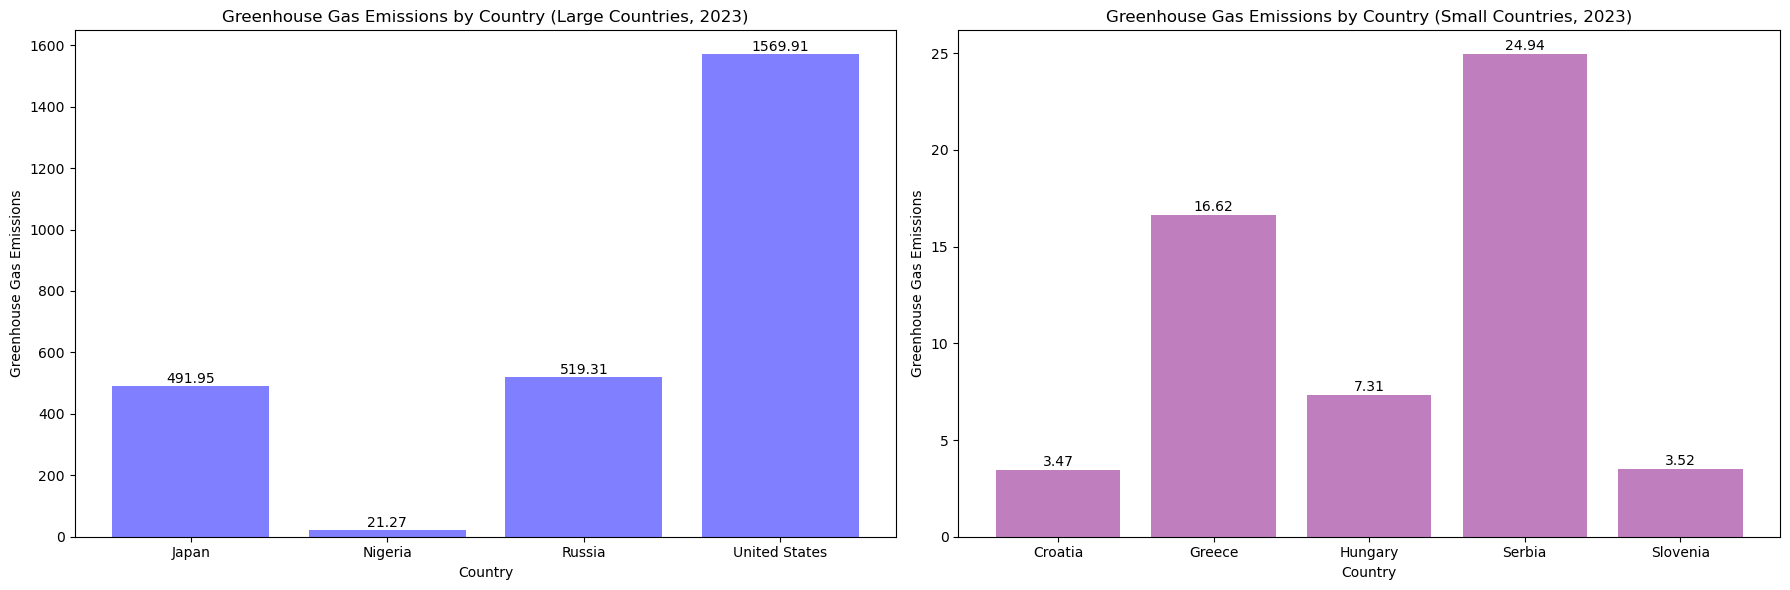

In [11]:
# Analyze large countries data
latest_year_large = large_countries_df["year"].max()

# Filter for the most recent year
df_recent_large = large_countries_df[large_countries_df["year"] == latest_year_large]

# Filter for selected countries
df_recent_large = df_recent_large[df_recent_large["country"].isin(selected_countries_large)]

# Select relevant columns
df_final_large = df_recent_large[["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows
print("Large Countries Data:\n", df_final_large.head())

# Analyze small countries data
latest_year_small = small_countries_df["year"].max()

# Filter for the most recent year
df_recent_small = small_countries_df[small_countries_df["year"] == latest_year_small]

# Filter for selected countries
df_recent_small = df_recent_small[df_recent_small["country"].isin(selected_countries_small)]

# Select relevant columns
df_final_small = df_recent_small[["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows
print("Small Countries Data:\n", df_final_small.head())

# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  

# Plot large countries bar chart on the first subplot
bars_large = axes[0].bar(df_final_large["country"], df_final_large["greenhouse_gas_emissions"], color='blue', alpha=0.5)
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Greenhouse Gas Emissions")
axes[0].set_title(f"Greenhouse Gas Emissions by Country (Large Countries, {latest_year_large})")

# Adding value labels on top of the bars for large countries
for bar in bars_large:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Plot small countries bar chart on the second subplot
bars_small = axes[1].bar(df_final_small["country"], df_final_small["greenhouse_gas_emissions"], color='purple', alpha=0.5)
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Greenhouse Gas Emissions")
axes[1].set_title(f"Greenhouse Gas Emissions by Country (Small Countries, {latest_year_small})")

# Adding value labels on top of the bars for small countries
for bar in bars_small:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=10)

# Display the plots
plt.tight_layout()  # Adjusts layout for better spacing
plt.savefig("bar_plt_large_and_small_countries_side_by_side.png")
plt.show()


In [12]:
# Filter greenhouse gas emissions data for selected small countries
#The result is assigned to the "country"_line variable.
slovenia_line = small_countries_df[small_countries_df["country"] == "Slovenia"][["country", "year", "greenhouse_gas_emissions"]]
serbia_line = small_countries_df[small_countries_df["country"] == "Serbia"][["country", "year", "greenhouse_gas_emissions"]]
greece_line = small_countries_df[small_countries_df["country"] == "Greece"][["country", "year", "greenhouse_gas_emissions"]]
hungary_line = small_countries_df[small_countries_df["country"] == "Hungary"][["country", "year", "greenhouse_gas_emissions"]]
croatia_line = small_countries_df[small_countries_df["country"] == "Croatia"][["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows to verify data for each country
print("Slovenia Data:\n", slovenia_line.head(), "\n")
print("Serbia Data:\n", serbia_line.head(), "\n")
print("Greece Data:\n", greece_line.head(), "\n")
print("Hungary Data:\n", hungary_line.head(), "\n")
print("Croatia Data:\n", croatia_line.head(), "\n")

Slovenia Data:
         country  year  greenhouse_gas_emissions
17507  Slovenia  2018                      4.91
17508  Slovenia  2019                      4.75
17509  Slovenia  2020                      4.68
17510  Slovenia  2021                      4.20
17511  Slovenia  2022                      3.44 

Serbia Data:
       country  year  greenhouse_gas_emissions
17255  Serbia  2018                     26.05
17256  Serbia  2019                     26.61
17257  Serbia  2020                     27.39
17258  Serbia  2021                     24.97
17259  Serbia  2022                     25.01 

Greece Data:
      country  year  greenhouse_gas_emissions
8243  Greece  2018                     28.68
8244  Greece  2019                     23.83
8245  Greece  2020                     20.10
8246  Greece  2021                     20.78
8247  Greece  2022                     19.44 

Hungary Data:
       country  year  greenhouse_gas_emissions
9140  Hungary  2018                      9.12
9141  Hun

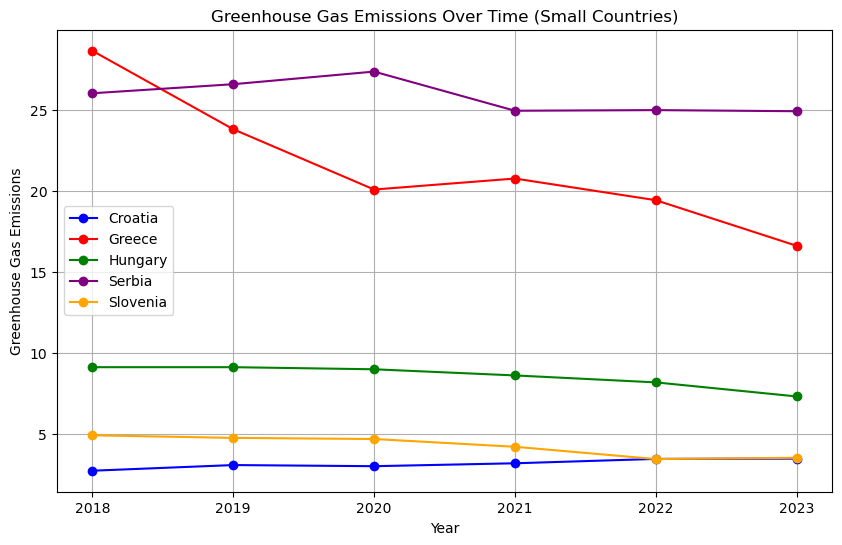

In [13]:
# Plot greenhouse gas emissions for selected small countries

# Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(croatia_line["year"], croatia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='blue', label="Croatia")
plt.plot(greece_line["year"], greece_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='red', label="Greece")
plt.plot(hungary_line["year"], hungary_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='green', label="Hungary")
plt.plot(serbia_line["year"], serbia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='purple', label="Serbia")
plt.plot(slovenia_line["year"], slovenia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='orange', label="Slovenia")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Greenhouse Gas Emissions")
plt.title("Greenhouse Gas Emissions Over Time (Small Countries)")

# Legend and grid
plt.legend()
plt.grid(True)

# Save figure as PNG
plt.savefig("line_plot_small_countries_data.png")

# Show plot
plt.show()



In [14]:
# Filter greenhouse gas emissions data for selected large countries
#The result is assigned to the "country"_line variable.
indonesia_line = large_countries_df[large_countries_df["country"] == "Indonesia"][["country", "year", "greenhouse_gas_emissions"]]
japan_line = large_countries_df[large_countries_df["country"] == "Japan"][["country", "year", "greenhouse_gas_emissions"]]
nigeria_line = large_countries_df[large_countries_df["country"] == "Nigeria"][["country", "year", "greenhouse_gas_emissions"]]
russia_line = large_countries_df[large_countries_df["country"] == "Russia"][["country", "year", "greenhouse_gas_emissions"]]
united_states_line = large_countries_df[large_countries_df["country"] == "United States"][["country", "year", "greenhouse_gas_emissions"]]

# Display first few rows to verify data for each country
print("Indonesia Data:\n", indonesia_line.head(), "\n")
print("Japan Data:\n", japan_line.head(), "\n")
print("Nigeria Data:\n", nigeria_line.head(), "\n")
print("Russia Data:\n", russia_line.head(), "\n")
print("United States Data:\n", united_states_line.head(), "\n")

Indonesia Data:
         country  year  greenhouse_gas_emissions
9447  Indonesia  2018                    194.13
9448  Indonesia  2019                    204.98
9449  Indonesia  2020                    199.91
9450  Indonesia  2021                    211.67
9451  Indonesia  2022                    225.45 

Japan Data:
       country  year  greenhouse_gas_emissions
10234   Japan  2018                    564.50
10235   Japan  2019                    537.49
10236   Japan  2020                    524.12
10237   Japan  2021                    518.55
10238   Japan  2022                    530.01 

Nigeria Data:
        country  year  greenhouse_gas_emissions
13779  Nigeria  2018                     16.92
13780  Nigeria  2019                     16.27
13781  Nigeria  2020                     18.00
13782  Nigeria  2021                     18.49
13783  Nigeria  2022                     19.09 

Russia Data:
       country  year  greenhouse_gas_emissions
16711  Russia  2018                    487.

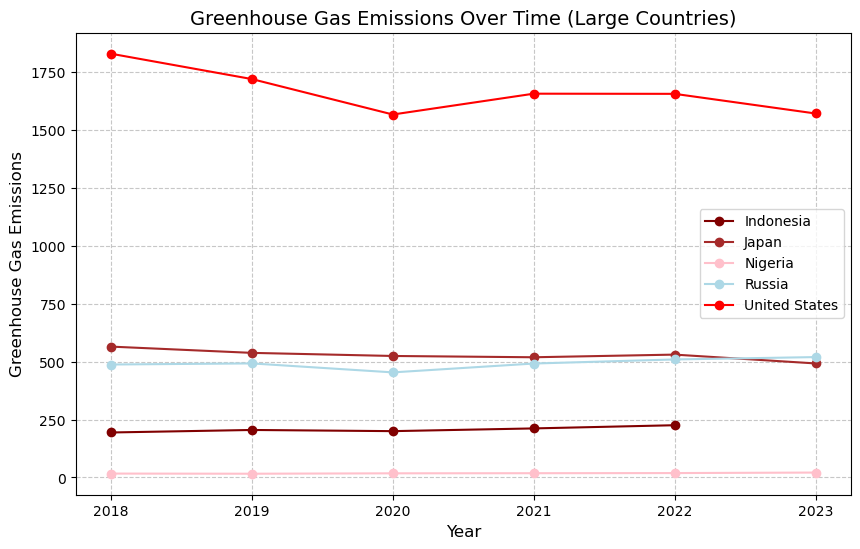

In [17]:
# Plot greenhouse gas emissions for selected large countries

#Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(indonesia_line["year"], indonesia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='maroon', label="Indonesia")
plt.plot(japan_line["year"], japan_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='brown', label="Japan")
plt.plot(nigeria_line["year"], nigeria_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='pink', label="Nigeria")
plt.plot(russia_line["year"], russia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='lightblue', label="Russia")  
plt.plot(united_states_line["year"], united_states_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='red', label="United States")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Greenhouse Gas Emissions", fontsize=12)
plt.title("Greenhouse Gas Emissions Over Time (Large Countries)", fontsize=14)  

# Legend and grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7) 

# Save figure as PNG
plt.savefig("line_plot_large_countries_data.png")

# Sow plot
plt.show()


In [125]:
#This code creates a side-by-side comparison of greenhouse gas emissions trends over time for small countries and large countries using line plots. Here's a breakdown of what it does:
#1. Setting up the figure with subplot
#Creates a figure (fig) with two subplots (axes[0] for small countries, axes[1] for large countries).
#figsize=(18, 8) ensures the plot is wide enough for a clear side-by-side comparison.
#2. Plot greenhouse gas emissions for small countries (Left subplot)
#Plots the emissions data for five small countries (Croatia, Greece, Hungary, Serbia, Slovenia).
#Uses different colors for each country.
#Adds marker='o' so that each data point is marked with a circle.
#Uses linestyle='-' to connect the points with lines.
#3. Formatting for small countries plot
Labels the X-axis as Year and the Y-axis as Greenhouse Gas Emissions.
#Gives a title to the subplot.
#Adds a legend so we can see which color corresponds to which country.
#Adds a grid with dashed lines (linestyle="--") to improve readability.
#4. Plot greenhouse gas emissions for large countries (Right subplot)
#Similar to the small countries subplot, this plots emissions data for five large countries (Indonesia, Japan, Nigeria, Russia, United States).
Each country has a unique color.
#5. Formatting for large countries plot
#Similar formatting as the small countries subplot.
#6. Adjust layout & Save the figure


SyntaxError: invalid syntax (3289248284.py, line 11)

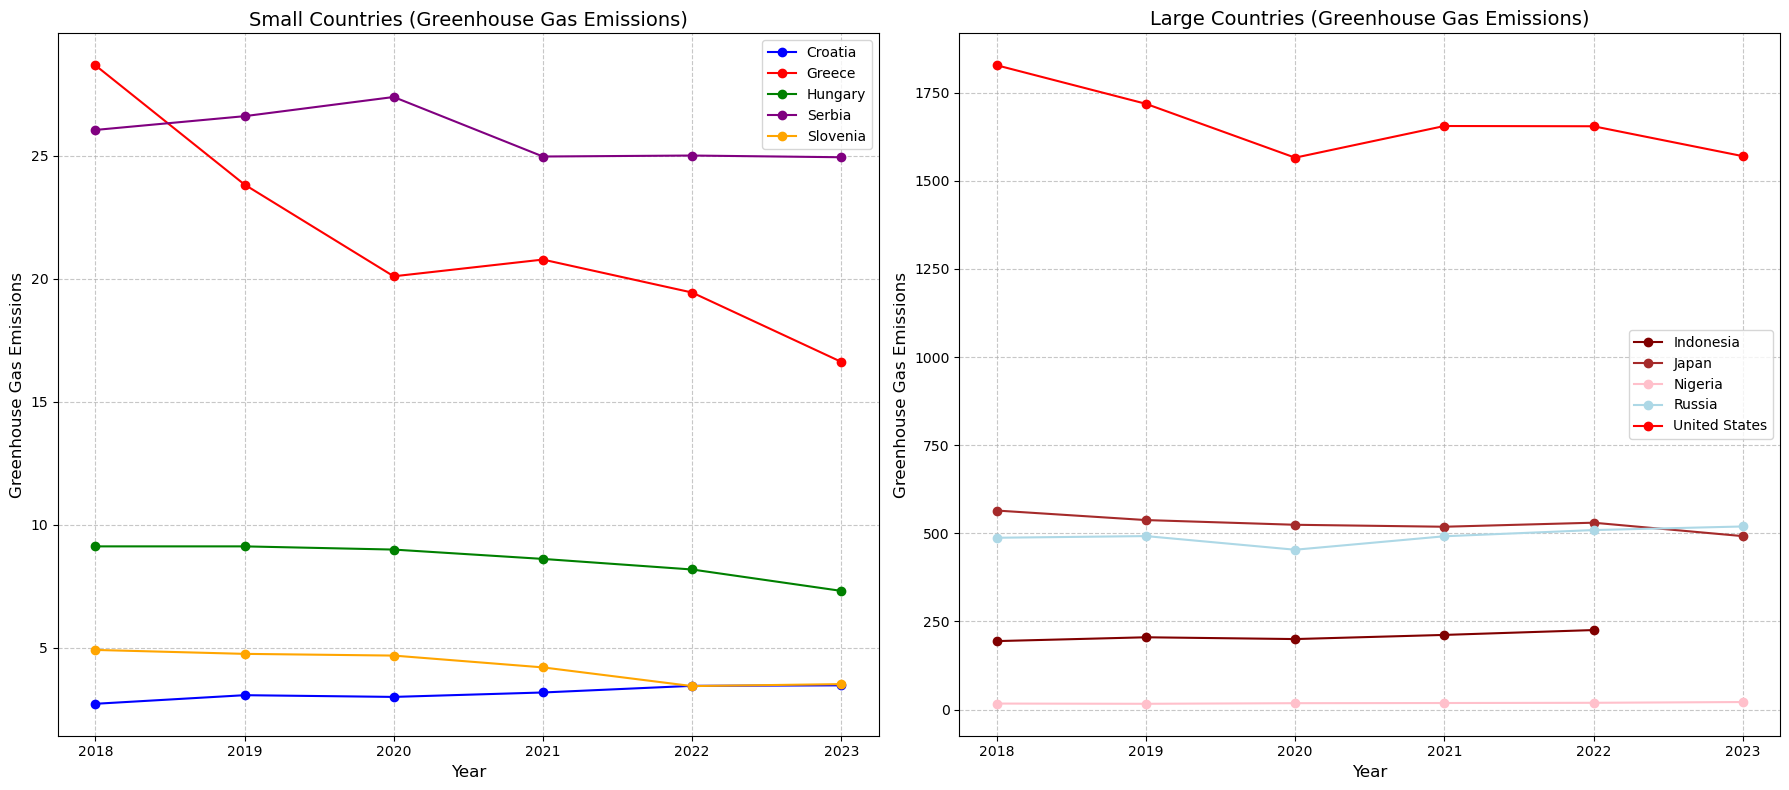

In [ ]:
# Set up the figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  

# Plot data for small countries on the first subplot (axes[0])
axes[0].plot(croatia_line["year"], croatia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='blue', label="Croatia")
axes[0].plot(greece_line["year"], greece_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='red', label="Greece")
axes[0].plot(hungary_line["year"], hungary_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='green', label="Hungary")
axes[0].plot(serbia_line["year"], serbia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='purple', label="Serbia")
axes[0].plot(slovenia_line["year"], slovenia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='orange', label="Slovenia")
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Greenhouse Gas Emissions", fontsize=12)
axes[0].set_title("Small Countries (Greenhouse Gas Emissions)", fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.7)  

# Plot data for large countries on the second subplot (axes[1])
axes[1].plot(indonesia_line["year"], indonesia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='maroon', label="Indonesia")
axes[1].plot(japan_line["year"], japan_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='brown', label="Japan")
axes[1].plot(nigeria_line["year"], nigeria_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='pink', label="Nigeria")
axes[1].plot(russia_line["year"], russia_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='lightblue', label="Russia")
axes[1].plot(united_states_line["year"], united_states_line["greenhouse_gas_emissions"], marker='o', linestyle='-', color='red', label="United States")
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Greenhouse Gas Emissions", fontsize=12)
axes[1].set_title("Large Countries (Greenhouse Gas Emissions)", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("line_plot_large_and_small_countries_side_by_side.png")
plt.show()




In [18]:
# Filter greenhouse gas emissions data for selected small countries
#The result is assigned to the "country"_line variable.
slovenia_line = small_countries_df[small_countries_df["country"] == "Slovenia"][["country", "year", "fossil_fuel_consumption"]]
serbia_line = small_countries_df[small_countries_df["country"] == "Serbia"][["country", "year", "fossil_fuel_consumption"]]
greece_line = small_countries_df[small_countries_df["country"] == "Greece"][["country", "year", "fossil_fuel_consumption"]]
hungary_line = small_countries_df[small_countries_df["country"] == "Hungary"][["country", "year", "fossil_fuel_consumption"]]
croatia_line = small_countries_df[small_countries_df["country"] == "Croatia"][["country", "year", "fossil_fuel_consumption"]]

# Display first few rows to verify data for each country
print("Slovenia Data:\n", slovenia_line.head(), "\n")
print("Serbia Data:\n", serbia_line.head(), "\n")
print("Greece Data:\n", greece_line.head(), "\n")
print("Hungary Data:\n", hungary_line.head(), "\n")
print("Croatia Data:\n", croatia_line.head(), "\n")

Slovenia Data:
         country  year  fossil_fuel_consumption
17507  Slovenia  2018                   52.877
17508  Slovenia  2019                   50.738
17509  Slovenia  2020                   45.377
17510  Slovenia  2021                   46.636
17511  Slovenia  2022                   44.889 

Serbia Data:
       country  year  fossil_fuel_consumption
17255  Serbia  2018                      NaN
17256  Serbia  2019                      NaN
17257  Serbia  2020                      NaN
17258  Serbia  2021                      NaN
17259  Serbia  2022                      NaN 

Greece Data:
      country  year  fossil_fuel_consumption
8243  Greece  2018                  279.214
8244  Greece  2019                  271.977
8245  Greece  2020                  228.208
8246  Greece  2021                  241.738
8247  Greece  2022                  252.595 

Hungary Data:
       country  year  fossil_fuel_consumption
9140  Hungary  2018                  217.812
9141  Hungary  2019          

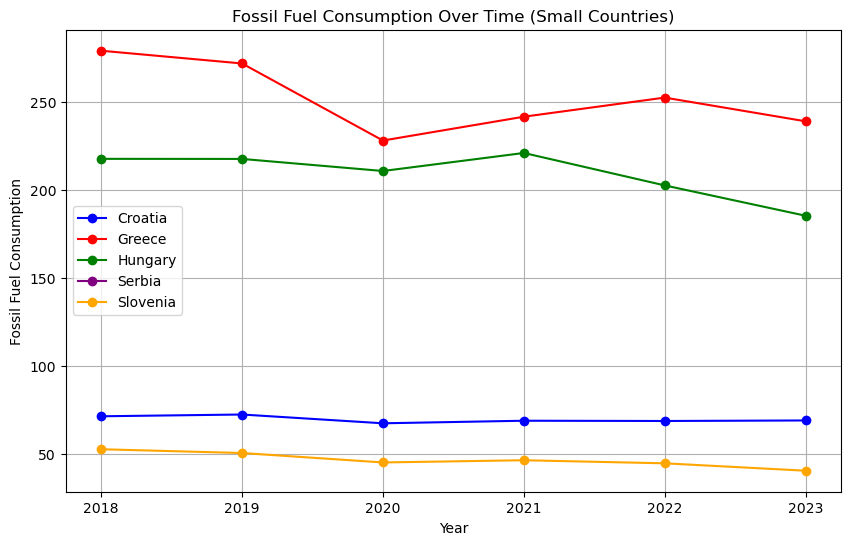

In [19]:
# Plot greenhouse gas emissions for selected small countries

# Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(croatia_line["year"], croatia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='blue', label="Croatia")
plt.plot(greece_line["year"], greece_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='red', label="Greece")
plt.plot(hungary_line["year"], hungary_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='green', label="Hungary")
plt.plot(serbia_line["year"], serbia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='purple', label="Serbia")
plt.plot(slovenia_line["year"], slovenia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='orange', label="Slovenia")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Fossil Fuel Consumption")
plt.title("Fossil Fuel Consumption Over Time (Small Countries)")

# Legend and grid
plt.legend()
plt.grid(True)

# Save figure as PNG
plt.savefig("line_plot_fossil_fuel_consumption_small_countries_data.png")

# Show plot
plt.show()

In [20]:
# Filter greenhouse gas emissions data for selected large countries
#The result is assigned to the "country"_line variable.
indonesia_line = large_countries_df[large_countries_df["country"] == "Indonesia"][["country", "year", "fossil_fuel_consumption"]]
japan_line = large_countries_df[large_countries_df["country"] == "Japan"][["country", "year", "fossil_fuel_consumption"]]
nigeria_line = large_countries_df[large_countries_df["country"] == "Nigeria"][["country", "year", "fossil_fuel_consumption"]]
russia_line = large_countries_df[large_countries_df["country"] == "Russia"][["country", "year", "fossil_fuel_consumption"]]
united_states_line = large_countries_df[large_countries_df["country"] == "United States"][["country", "year", "fossil_fuel_consumption"]]

# Display first few rows to verify data for each country
print("Indonesia Data:\n", indonesia_line.head(), "\n")
print("Japan Data:\n", japan_line.head(), "\n")
print("Nigeria Data:\n", nigeria_line.head(), "\n")
print("Russia Data:\n", russia_line.head(), "\n")
print("United States Data:\n", united_states_line.head(), "\n")

Indonesia Data:
         country  year  fossil_fuel_consumption
9447  Indonesia  2018                 1984.084
9448  Indonesia  2019                 2109.228
9449  Indonesia  2020                 1942.665
9450  Indonesia  2021                 1975.075
9451  Indonesia  2022                 2515.085 

Japan Data:
       country  year  fossil_fuel_consumption
10234   Japan  2018                 4710.478
10235   Japan  2019                 4556.221
10236   Japan  2020                 4189.554
10237   Japan  2021                 4316.124
10238   Japan  2022                 4294.471 

Nigeria Data:
        country  year  fossil_fuel_consumption
13779  Nigeria  2018                      NaN
13780  Nigeria  2019                      NaN
13781  Nigeria  2020                      NaN
13782  Nigeria  2021                      NaN
13783  Nigeria  2022                      NaN 

Russia Data:
       country  year  fossil_fuel_consumption
16711  Russia  2018                 7403.697
16712  Russia  20

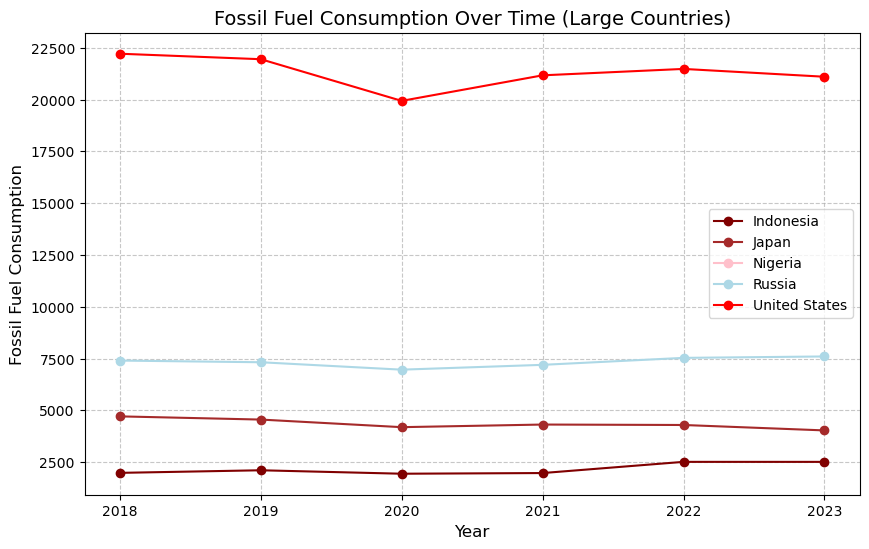

In [21]:
# Plot greenhouse gas emissions for selected large countries

#Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(indonesia_line["year"], indonesia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='maroon', label="Indonesia")
plt.plot(japan_line["year"], japan_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='brown', label="Japan")
plt.plot(nigeria_line["year"], nigeria_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='pink', label="Nigeria")
plt.plot(russia_line["year"], russia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='lightblue', label="Russia")  
plt.plot(united_states_line["year"], united_states_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='red', label="United States")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Fossil Fuel Consumption", fontsize=12)
plt.title("Fossil Fuel Consumption Over Time (Large Countries)", fontsize=14)  

# Legend and grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7) 

# Save figure as PNG
plt.savefig("line_plot_fossil_fuel_consumption_large_countries_data.png")

# Sow plot
plt.show()

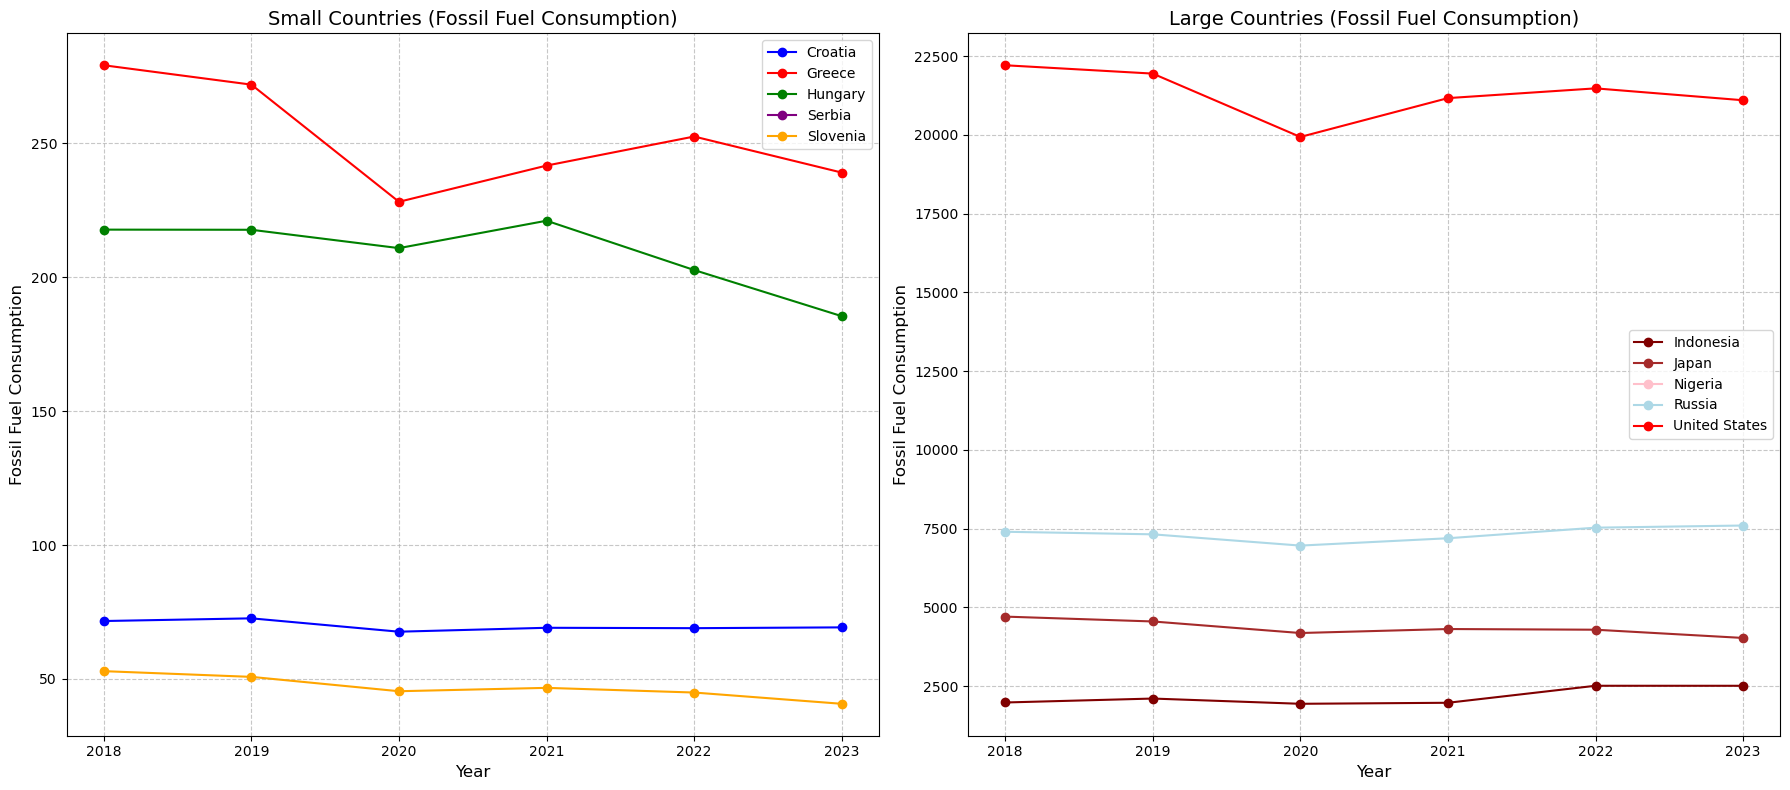

In [22]:
# Set up the figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  

# Plot data for small countries on the first subplot (axes[0])
axes[0].plot(croatia_line["year"], croatia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='blue', label="Croatia")
axes[0].plot(greece_line["year"], greece_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='red', label="Greece")
axes[0].plot(hungary_line["year"], hungary_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='green', label="Hungary")
axes[0].plot(serbia_line["year"], serbia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='purple', label="Serbia")
axes[0].plot(slovenia_line["year"], slovenia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='orange', label="Slovenia")
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Fossil Fuel Consumption", fontsize=12)
axes[0].set_title("Small Countries (Fossil Fuel Consumption)", fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.7)  

# Plot data for large countries on the second subplot (axes[1])
axes[1].plot(indonesia_line["year"], indonesia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='maroon', label="Indonesia")
axes[1].plot(japan_line["year"], japan_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='brown', label="Japan")
axes[1].plot(nigeria_line["year"], nigeria_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='pink', label="Nigeria")
axes[1].plot(russia_line["year"], russia_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='lightblue', label="Russia")
axes[1].plot(united_states_line["year"], united_states_line["fossil_fuel_consumption"], marker='o', linestyle='-', color='red', label="United States")
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Fossil Fuel Consumption", fontsize=12)
axes[1].set_title("Large Countries (Fossil Fuel Consumption)", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("line_plot_fossil_fuel_consumption_large_and_small_countries_side_by_side.png")
plt.show()

In [23]:
# Filter greenhouse gas emissions data for selected small countries
#The result is assigned to the "country"_line variable.
slovenia_line = small_countries_df[small_countries_df["country"] == "Slovenia"][["country", "year", "electricity_generation"]]
serbia_line = small_countries_df[small_countries_df["country"] == "Serbia"][["country", "year", "electricity_generation"]]
greece_line = small_countries_df[small_countries_df["country"] == "Greece"][["country", "year", "electricity_generation"]]
hungary_line = small_countries_df[small_countries_df["country"] == "Hungary"][["country", "year", "electricity_generation"]]
croatia_line = small_countries_df[small_countries_df["country"] == "Croatia"][["country", "year", "electricity_generation"]]

# Display first few rows to verify data for each country
print("Slovenia Data:\n", slovenia_line.head(), "\n")
print("Serbia Data:\n", serbia_line.head(), "\n")
print("Greece Data:\n", greece_line.head(), "\n")
print("Hungary Data:\n", hungary_line.head(), "\n")
print("Croatia Data:\n", croatia_line.head(), "\n")

Slovenia Data:
         country  year  electricity_generation
17507  Slovenia  2018                   16.12
17508  Slovenia  2019                   15.89
17509  Slovenia  2020                   16.89
17510  Slovenia  2021                   15.59
17511  Slovenia  2022                   13.36 

Serbia Data:
       country  year  electricity_generation
17255  Serbia  2018                   37.42
17256  Serbia  2019                   37.60
17257  Serbia  2020                   37.95
17258  Serbia  2021                   38.23
17259  Serbia  2022                   35.95 

Greece Data:
      country  year  electricity_generation
8243  Greece  2018                   52.61
8244  Greece  2019                   47.95
8245  Greece  2020                   47.51
8246  Greece  2021                   54.24
8247  Greece  2022                   51.61 

Hungary Data:
       country  year  electricity_generation
9140  Hungary  2018                   32.05
9141  Hungary  2019                   34.28
9142 

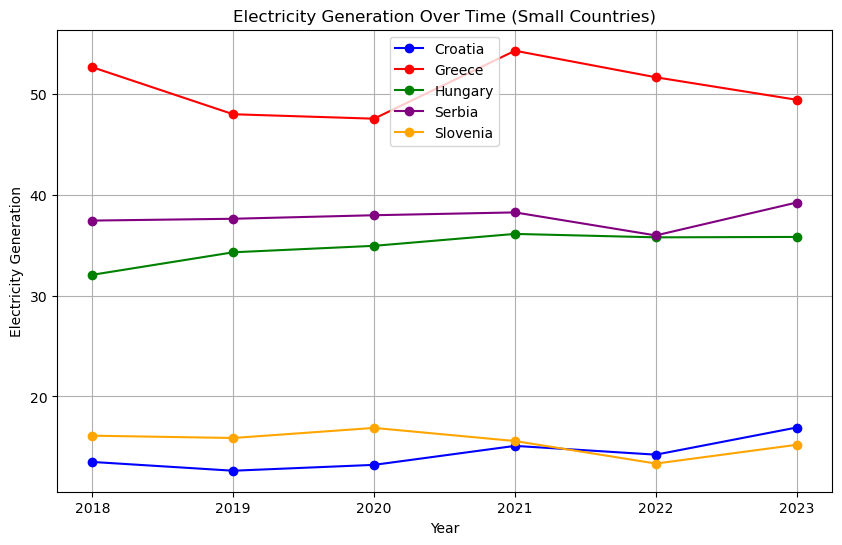

In [27]:
# Plot electricity generation for selected small countries

# Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(croatia_line["year"], croatia_line["electricity_generation"], marker='o', linestyle='-', color='blue', label="Croatia")
plt.plot(greece_line["year"], greece_line["electricity_generation"], marker='o', linestyle='-', color='red', label="Greece")
plt.plot(hungary_line["year"], hungary_line["electricity_generation"], marker='o', linestyle='-', color='green', label="Hungary")
plt.plot(serbia_line["year"], serbia_line["electricity_generation"], marker='o', linestyle='-', color='purple', label="Serbia")
plt.plot(slovenia_line["year"], slovenia_line["electricity_generation"], marker='o', linestyle='-', color='orange', label="Slovenia")

# Labels and title
plt.xlabel("Year")
plt.ylabel("Electricity Generation")
plt.title("Electricity Generation Over Time (Small Countries)")

# Legend and grid
plt.legend()
plt.grid(True)

# Save figure as PNG
plt.savefig("line_plot_electricity_generation_small_countries_data.png")

# Show plot
plt.show()


In [28]:
# Filter greenhouse gas emissions data for selected large countries
#The result is assigned to the "country"_line variable.
indonesia_line = large_countries_df[large_countries_df["country"] == "Indonesia"][["country", "year", "electricity_generation"]]
japan_line = large_countries_df[large_countries_df["country"] == "Japan"][["country", "year", "electricity_generation"]]
nigeria_line = large_countries_df[large_countries_df["country"] == "Nigeria"][["country", "year", "electricity_generation"]]
russia_line = large_countries_df[large_countries_df["country"] == "Russia"][["country", "year", "electricity_generation"]]
united_states_line = large_countries_df[large_countries_df["country"] == "United States"][["country", "year", "electricity_generation"]]

# Display first few rows to verify data for each country
print("Indonesia Data:\n", indonesia_line.head(), "\n")
print("Japan Data:\n", japan_line.head(), "\n")
print("Nigeria Data:\n", nigeria_line.head(), "\n")
print("Russia Data:\n", russia_line.head(), "\n")
print("United States Data:\n", united_states_line.head(), "\n")

Indonesia Data:
         country  year  electricity_generation
9447  Indonesia  2018                  283.79
9448  Indonesia  2019                  295.44
9449  Indonesia  2020                  291.82
9450  Indonesia  2021                  309.36
9451  Indonesia  2022                  333.54 

Japan Data:
       country  year  electricity_generation
10234   Japan  2018                 1053.18
10235   Japan  2019                 1025.78
10236   Japan  2020                  996.96
10237   Japan  2021                 1019.71
10238   Japan  2022                 1033.55 

Nigeria Data:
        country  year  electricity_generation
13779  Nigeria  2018                   33.41
13780  Nigeria  2019                   33.12
13781  Nigeria  2020                   35.07
13782  Nigeria  2021                   36.06
13783  Nigeria  2022                   36.98 

Russia Data:
       country  year  electricity_generation
16711  Russia  2018                 1109.19
16712  Russia  2019                 1

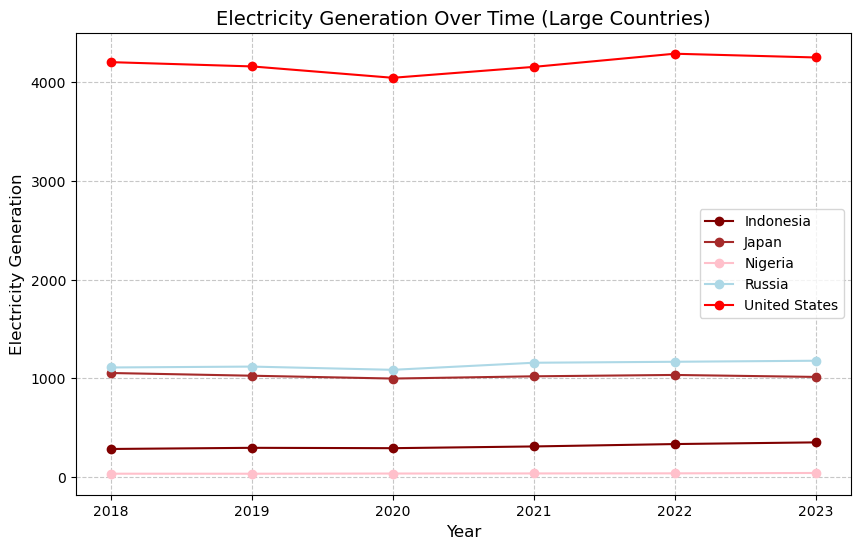

In [29]:
# Plot greenhouse gas emissions for selected large countries

#Set figure size
plt.figure(figsize=(10, 6))

# Plot data for each country
plt.plot(indonesia_line["year"], indonesia_line["electricity_generation"], marker='o', linestyle='-', color='maroon', label="Indonesia")
plt.plot(japan_line["year"], japan_line["electricity_generation"], marker='o', linestyle='-', color='brown', label="Japan")
plt.plot(nigeria_line["year"], nigeria_line["electricity_generation"], marker='o', linestyle='-', color='pink', label="Nigeria")
plt.plot(russia_line["year"], russia_line["electricity_generation"], marker='o', linestyle='-', color='lightblue', label="Russia")  
plt.plot(united_states_line["year"], united_states_line["electricity_generation"], marker='o', linestyle='-', color='red', label="United States")

# Labels and title
plt.xlabel("Year", fontsize=12)
plt.ylabel("Electricity Generation", fontsize=12)
plt.title("Electricity Generation Over Time (Large Countries)", fontsize=14)  

# Legend and grid
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7) 

# Save figure as PNG
plt.savefig("line_plot_electricity_generation_large_countries_data.png")

# Sow plot
plt.show()

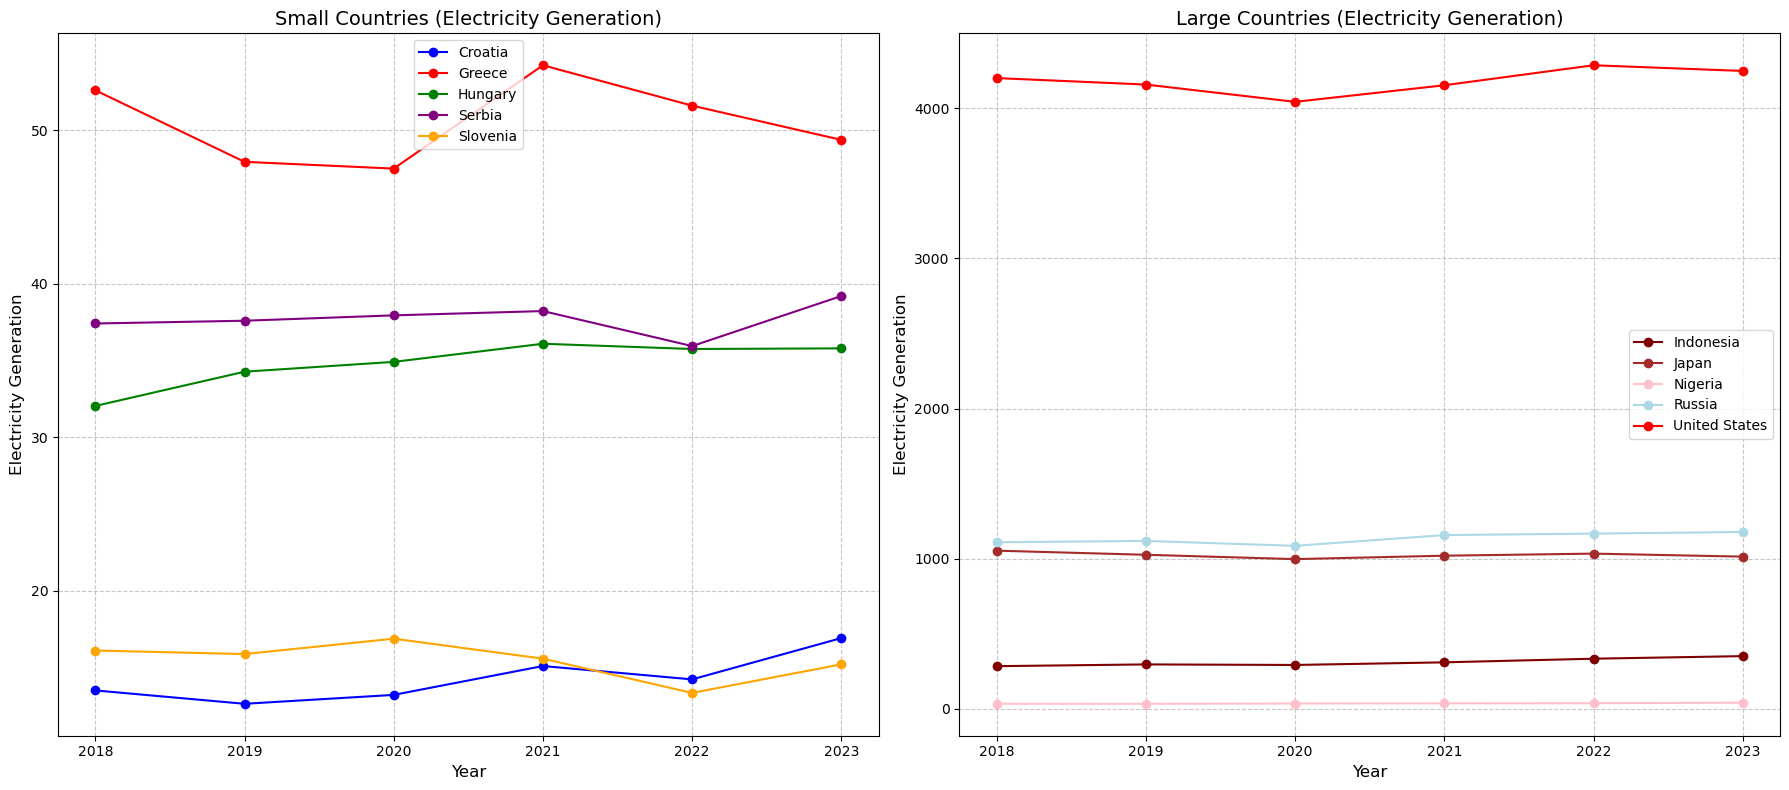

In [30]:
# Set up the figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))  

# Plot data for small countries on the first subplot (axes[0])
axes[0].plot(croatia_line["year"], croatia_line["electricity_generation"], marker='o', linestyle='-', color='blue', label="Croatia")
axes[0].plot(greece_line["year"], greece_line["electricity_generation"], marker='o', linestyle='-', color='red', label="Greece")
axes[0].plot(hungary_line["year"], hungary_line["electricity_generation"], marker='o', linestyle='-', color='green', label="Hungary")
axes[0].plot(serbia_line["year"], serbia_line["electricity_generation"], marker='o', linestyle='-', color='purple', label="Serbia")
axes[0].plot(slovenia_line["year"], slovenia_line["electricity_generation"], marker='o', linestyle='-', color='orange', label="Slovenia")
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Electricity Generation", fontsize=12)
axes[0].set_title("Small Countries (Electricity Generation)", fontsize=14)
axes[0].legend()
axes[0].grid(True, linestyle="--", alpha=0.7)  

# Plot data for large countries on the second subplot (axes[1])
axes[1].plot(indonesia_line["year"], indonesia_line["electricity_generation"], marker='o', linestyle='-', color='maroon', label="Indonesia")
axes[1].plot(japan_line["year"], japan_line["electricity_generation"], marker='o', linestyle='-', color='brown', label="Japan")
axes[1].plot(nigeria_line["year"], nigeria_line["electricity_generation"], marker='o', linestyle='-', color='pink', label="Nigeria")
axes[1].plot(russia_line["year"], russia_line["electricity_generation"], marker='o', linestyle='-', color='lightblue', label="Russia")
axes[1].plot(united_states_line["year"], united_states_line["electricity_generation"], marker='o', linestyle='-', color='red', label="United States")
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Electricity Generation", fontsize=12)
axes[1].set_title("Large Countries (Electricity Generation)", fontsize=14)
axes[1].legend()
axes[1].grid(True, linestyle="--", alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
plt.savefig("line_plot_electricity_generation_large_and_small_countries_side_by_side.png")
plt.show()


Correlation Coefficient (R-value): 0.57


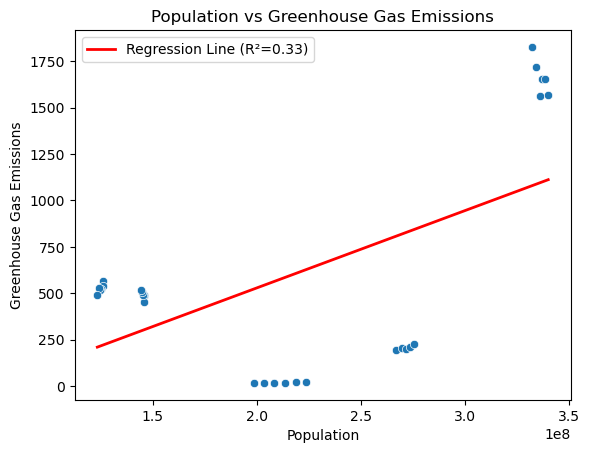

In [ ]:
#Clean the date and ensure there are no NaN values in the population and greenhouse_gas_emissions columns
large_countries_df_clean = large_countries_df.dropna(subset=["population", "greenhouse_gas_emissions"])

# Extract data for linear regression(Assigns the population data to x (independent variable) and the greenhouse gas emissions data to y(dependent variable).
x = large_countries_df_clean["population"]
y = large_countries_df_clean["greenhouse_gas_emissions"]

# Perform linear regression using linregress (linregress from SciPy is used to calculate the slope, intercept, r-value (correlation coefficient), p-value, and standard error of the regression line.)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Check if r_value is NaN (This checks if the r-value (correlation coefficient) is NaN (not a number), which would indicate issues with the data. Otherwise, it prints the r-value.)
if np.isnan(r_value):
    print("R-value is NaN, check the data for issues.")
else:
    print(f"Correlation Coefficient (R-value): {r_value:.2f}")

# Create regression line points for plotting (Generates 100 evenly spaced points between the minimum and maximum values of the population to plot a smooth regression line.)
x_pred = np.linspace(x.min(), x.max(), 100)  
y_pred = slope * x_pred + intercept

# Plot scatter plot (Creates a scatter plot of the population vs. greenhouse gas emissions.)
sns.scatterplot(x=x, y=y)
plt.xlabel("Population")
plt.ylabel("Greenhouse Gas Emissions")
plt.title("Population vs Greenhouse Gas Emissions")

# Plot regression line (Adds the regression line to the plot, which represents the relationship between population and greenhouse gas emissions.
# The R² value is included in the label of the line (coefficient of determination).)

plt.plot(x_pred, y_pred, color="red", linewidth=2, label=f"Regression Line (R²={r_value**2:.2f})")

# Show the plot with regression line
plt.legend()
plt.savefig("population_vs_ghg_emissions_large_countries.png")
plt.show()



Correlation Coefficient (R-value): 0.60


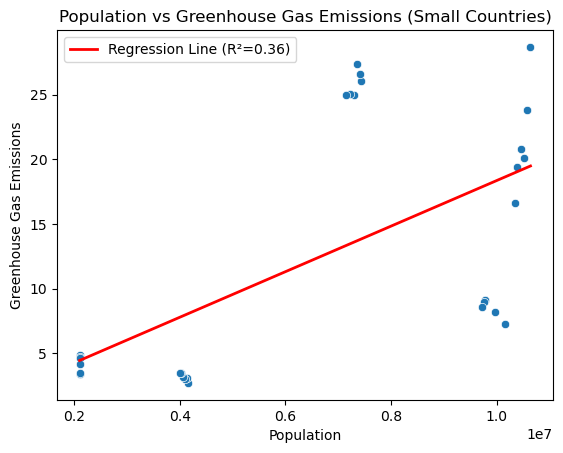

In [ ]:
#Clean the date and ensure there are no NaN values in the population and greenhouse_gas_emissions columns
small_countries_df_clean = small_countries_df.dropna(subset=["population", "greenhouse_gas_emissions"])

# Extract data for linear regression(Assigns the population data to x (independent variable) and the greenhouse gas emissions data to y(dependent variable).
x = small_countries_df_clean["population"]
y = small_countries_df_clean["greenhouse_gas_emissions"]

# Perform linear regression using linregress (linregress from SciPy is used to calculate the slope, intercept, r-value (correlation coefficient), p-value, and standard error of the regression line.)
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Check if r_value is NaN (This checks if the r-value (correlation coefficient) is NaN (not a number), which would indicate issues with the data. Otherwise, it prints the r-value.)
if np.isnan(r_value):
    print("R-value is NaN, check the data for issues.")
else:
    print(f"Correlation Coefficient (R-value): {r_value:.2f}")

# Create regression line points for plotting (Generates 100 evenly spaced points between the minimum and maximum values of the population to plot a smooth regression line.)
x_pred = np.linspace(x.min(), x.max(), 100)  
y_pred = slope * x_pred + intercept

#(Create a scatter plot of the population vs. greenhouse gas emissions.)
sns.scatterplot(x=x, y=y)
plt.xlabel("Population")
plt.ylabel("Greenhouse Gas Emissions")
plt.title("Population vs Greenhouse Gas Emissions (Small Countries)")

# Plot regression line (Adds the regression line to the plot, which represents the relationship between population and greenhouse gas emissions.
# The R² value is included in the label of the line (coefficient of determination).)
plt.plot(x_pred, y_pred, color="red", linewidth=2, label=f"Regression Line (R²={r_value**2:.2f})")

# Show the plot with regression line
plt.legend()
plt.savefig("population_vs_ghg_emissions_small_countries.png")
plt.show()


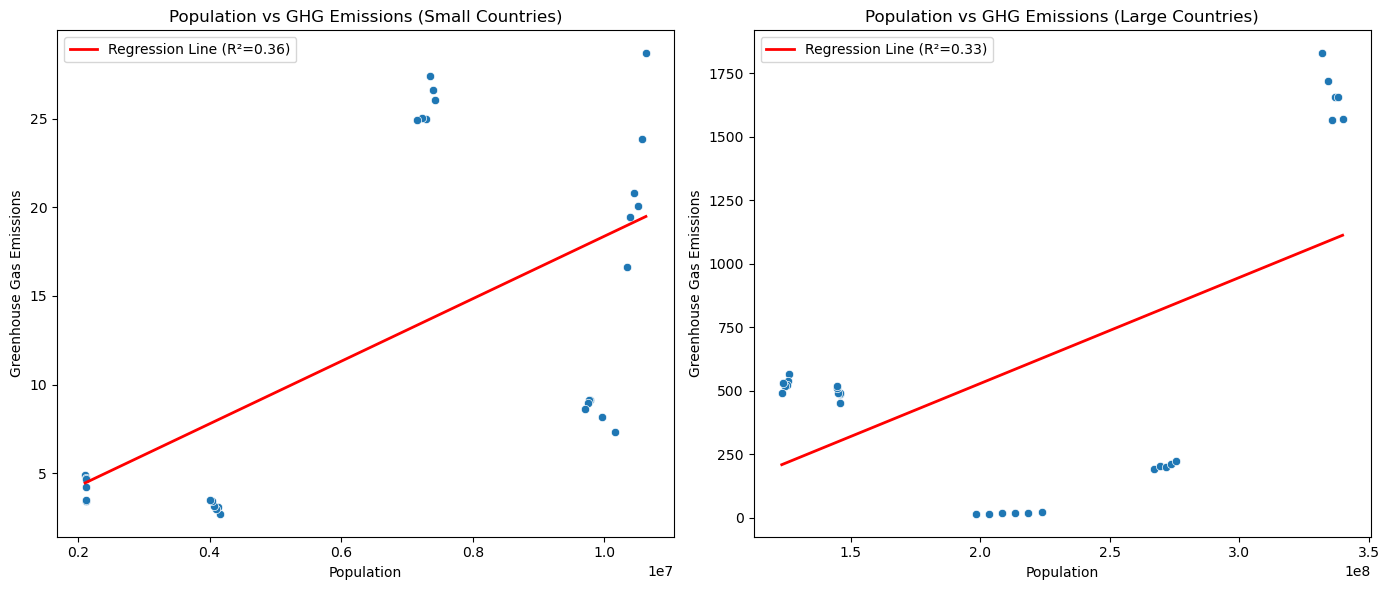

In [93]:

# Ensure there are no NaN values in the population and greenhouse_gas_emissions columns
small_countries_df_clean = small_countries_df.dropna(subset=["population", "greenhouse_gas_emissions"])

# Extract data for linear regression
x_small = small_countries_df_clean["population"]
y_small = small_countries_df_clean["greenhouse_gas_emissions"]

# Perform linear regression using linregress
slope_small, intercept_small, r_value_small, _, _ = linregress(x_small, y_small)

# Create regression line points for small countries
x_pred_small = np.linspace(x_small.min(), x_small.max(), 100)
y_pred_small = slope_small * x_pred_small + intercept_small

# Ensure there are no NaN values in the population and greenhouse_gas_emissions columns for large countries
large_countries_df_clean = large_countries_df.dropna(subset=["population", "greenhouse_gas_emissions"])

# Extract data for linear regression
x_large = large_countries_df_clean["population"]
y_large = large_countries_df_clean["greenhouse_gas_emissions"]

# Perform linear regression using linregress
slope_large, intercept_large, r_value_large, _, _ = linregress(x_large, y_large)

# Create regression line points for large countries
x_pred_large = np.linspace(x_large.min(), x_large.max(), 100)
y_pred_large = slope_large * x_pred_large + intercept_large

# Create subplots (side by side)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Small countries plot
sns.scatterplot(x=x_small, y=y_small, ax=ax[0])
ax[0].plot(x_pred_small, y_pred_small, color="red", linewidth=2, label=f"Regression Line (R²={r_value_small**2:.2f})")
ax[0].set_xlabel("Population")
ax[0].set_ylabel("Greenhouse Gas Emissions")
ax[0].set_title("Population vs GHG Emissions (Small Countries)")
ax[0].legend()

# Large countries plot
sns.scatterplot(x=x_large, y=y_large, ax=ax[1])
ax[1].plot(x_pred_large, y_pred_large, color="red", linewidth=2, label=f"Regression Line (R²={r_value_large**2:.2f})")
ax[1].set_xlabel("Population")
ax[1].set_ylabel("Greenhouse Gas Emissions")
ax[1].set_title("Population vs GHG Emissions (Large Countries)")
ax[1].legend()

# Show the plot side by side
plt.tight_layout()
plt.savefig("population_vs_ghg_emission_combined")
plt.show()

